# Titanic survived Project

# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df1 = df.drop_duplicates()

In [8]:
df1.shape

(891, 12)

<AxesSubplot:xlabel='Survived'>

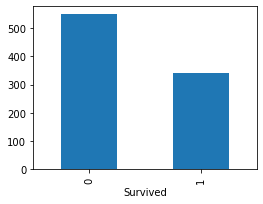

In [9]:
# creating Bar plot 
groupdata = df1.groupby('Survived').size()
groupdata.plot(kind = 'bar', figsize=(4, 3))

In [10]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
#removing unwanted data
data = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df1 = df1.drop(data, axis =1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

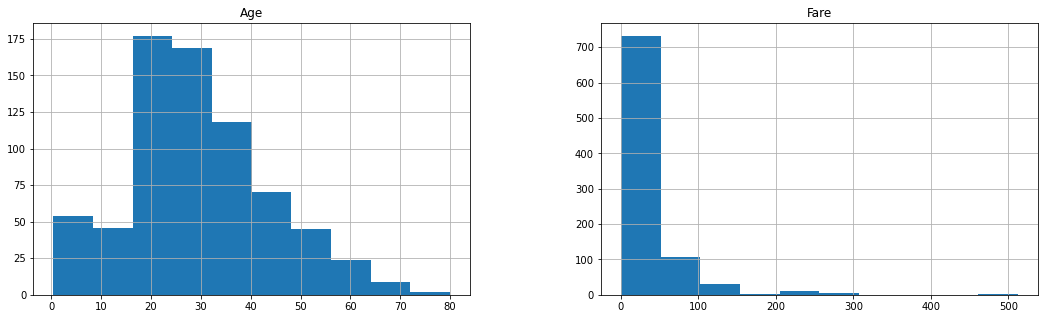

In [12]:
#creating histogram of multiple column
df1.hist(['Age', 'Fare'], figsize = (18,5))

In [13]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
df2 = df1.dropna()
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df2['Fare'][df2['Fare']<300].sort_values(ascending=False)

438    263.000
88     263.000
341    263.000
27     263.000
311    262.375
        ...   
597      0.000
822      0.000
302      0.000
263      0.000
271      0.000
Name: Fare, Length: 709, dtype: float64

In [19]:
df2['Fare'][df2['Fare']>300] = 263.0

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

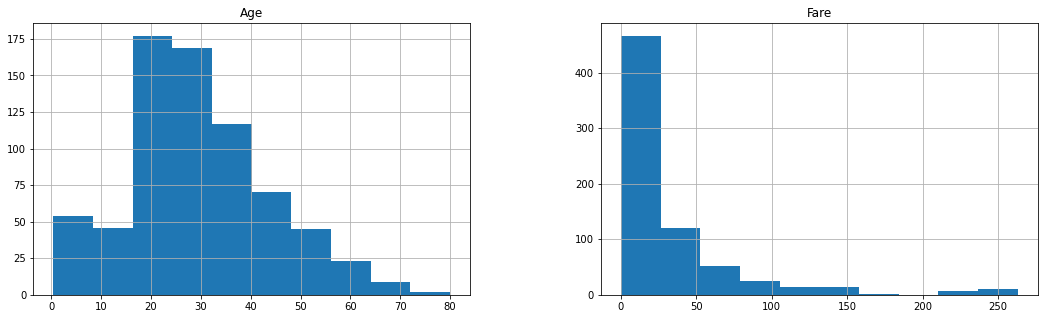

In [21]:
#histogram after removing the outliers
df2.hist(['Age','Fare'], figsize=(18,5))

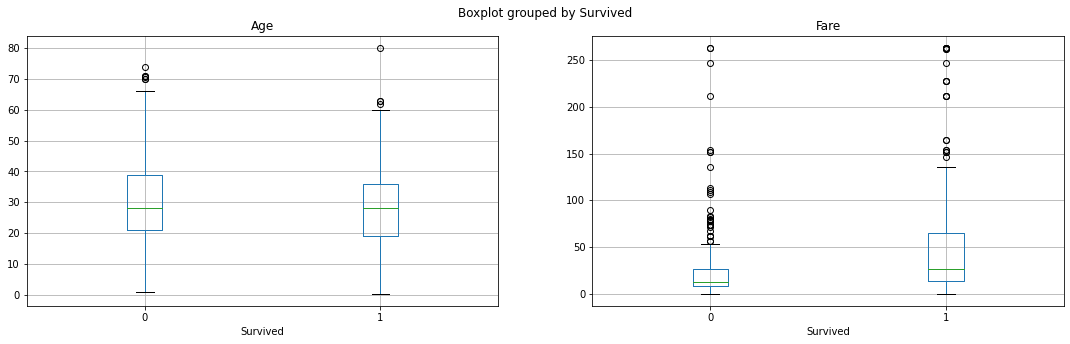

In [23]:
col_list=['Age','Fare']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(col_list), figsize=(18,5))

for PredictorCol , i in zip(col_list, range(len(col_list))):
    df2.boxplot(column=PredictorCol, by='Survived', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [24]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [26]:
ContinuousVariables=['Age','Fare']
FunctionAnova(inpData=df2, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is correlated with Survived | P-Value: 0.027820316250842768
Fare is correlated with Survived | P-Value: 1.6130644816343835e-14


['Age', 'Fare']

In [27]:
CrossTabResult=pd.crosstab(index=df2['Sex'], columns=df2['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,64,195
male,360,93


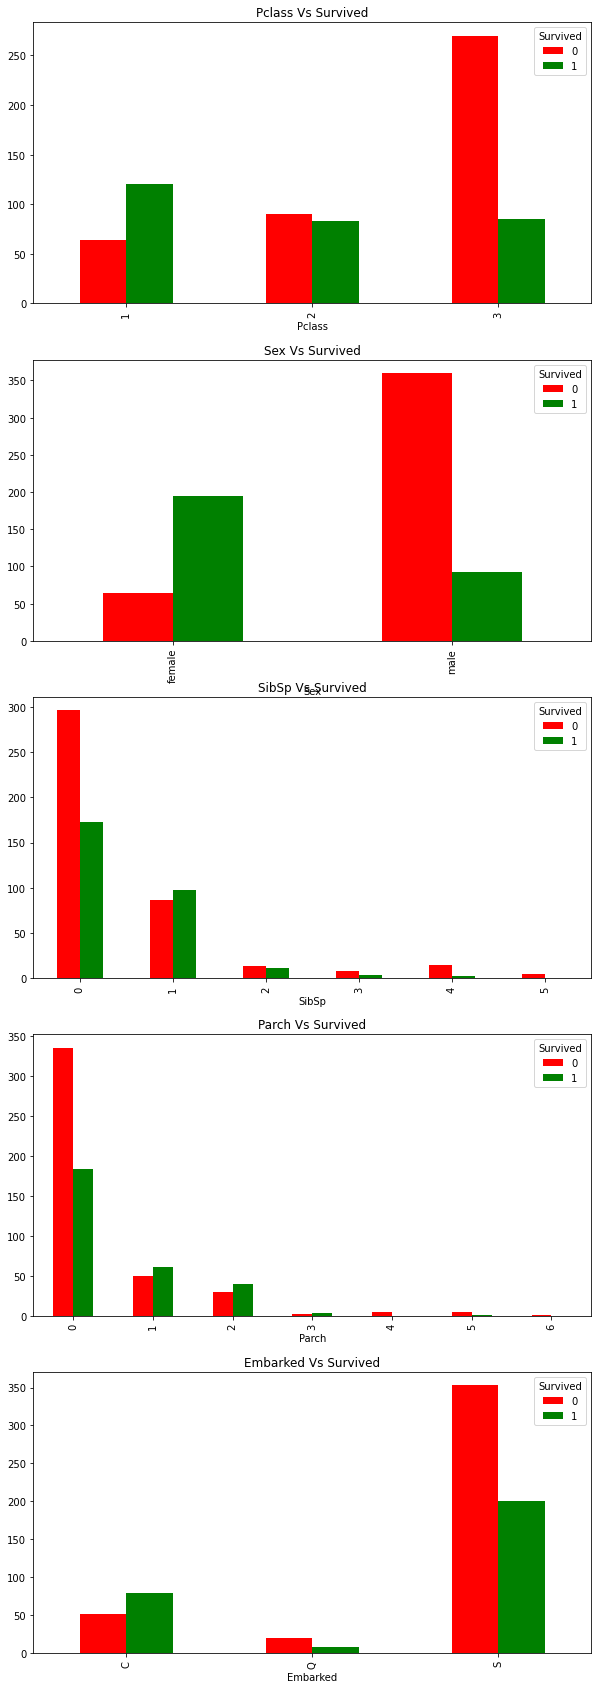

In [29]:
CategoricalColsList=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df2[CategoricalCol], columns=df2['Survived'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Survived')

In [30]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [32]:
CategoricalVariables=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

FunctionChisq(inpData=df2, 
              TargetVariable='Survived',
              CategoricalVariablesList= CategoricalVariables)

Pclass is correlated with Survived | P-Value: 1.6675060315554636e-20
Sex is correlated with Survived | P-Value: 4.939416685451492e-46
SibSp is correlated with Survived | P-Value: 0.00042907488830226415
Parch is correlated with Survived | P-Value: 6.681060065052954e-05
Embarked is correlated with Survived | P-Value: 8.660306799267892e-07


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

## Selecting final prediction for machine learning

In [34]:
SelectedColumns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Fare']

DataForML=df2[SelectedColumns]
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [35]:
DataForML.to_pickle('DataForML.pkl')

In [36]:
DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)

In [38]:
#Converting the nominal variable to numeric using get_dummies()¶
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric['Survived']=df2['Survived']

DataForML_Numeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


In [39]:
DataForML_Numeric.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

In [40]:
TargetVariable='Survived'
Predictors=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [41]:
#Normalized the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(498, 8)
(498,)
(214, 8)
(214,)


## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       122
           1       0.73      0.66      0.69        92

    accuracy                           0.75       214
   macro avg       0.74      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214

[[99 23]
 [31 61]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.73679517 0.7074511  0.7684752  0.83249742 0.71956945 0.77565556
 0.76915854 0.78470142 0.8028169  0.8134079 ]

Final Average Accuracy of the model: 0.77


## Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       122
           1       0.79      0.63      0.70        92

    accuracy                           0.77       214
   macro avg       0.78      0.75      0.76       214
weighted avg       0.77      0.77      0.77       214

[[107  15]
 [ 34  58]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.80555556 0.77220364 0.79477575 0.83188788 0.77324412 0.79999526
 0.79276546 0.74640632 0.82856736 0.79801372]

Final Average Accuracy of the model: 0.79


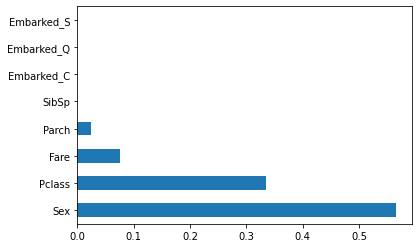

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

print(clf)

DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       122
           1       0.81      0.59      0.68        92

    accuracy                           0.76       214
   macro avg       0.77      0.74      0.74       214
weighted avg       0.77      0.76      0.75       214

[[109  13]
 [ 38  54]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.73269743 0.63183325 0.74487521 0.84455237 0.81637233 0.84211438
 0.77237307 0.70395065 0.81137807 0.82481323]

Final Average Accuracy of the model: 0.77


<AxesSubplot:>

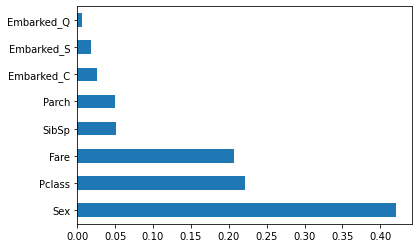

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

print(clf)

RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

print(clf)
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       122
           1       0.79      0.54      0.65        92

    accuracy                           0.74       214
   macro avg       0.76      0.72      0.72       214
weighted avg       0.75      0.74      0.73       214

[[109  13]
 [ 42  50]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.71531987 0.69747475 0.68991688 0.85990657 0.79561543 0.77142315
 0.76641764 0.76316052 0.79801372 0.77624087]

Final Average Accuracy of the model: 0.76


In [51]:
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

print(clf)

SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

%matplotlib inline

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       122
           1       0.75      0.63      0.69        92

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214

[[103  19]
 [ 34  58]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.80648148 0.7614289  0.7974158  0.83188788 0.74647887 0.7866131
 0.74030336 0.720767   0.8015886  0.77142315]

Final Average Accuracy of the model: 0.78


In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf = GaussianNB()
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       122
           1       0.74      0.67      0.70        92

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214

[[100  22]
 [ 30  62]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.68263765 0.66450216 0.7684752  0.73473758 0.69238982 0.79001514
 0.8028169  0.8028169  0.77565556 0.81735009]

Final Average Accuracy of the model: 0.75


In [53]:
TargetVariable='Survived'

Predictors=['Fare', 'Sex', 'Parch', 'Pclass']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(712, 4)
(712,)


In [54]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

FinalDecisionTreeModel=clf.fit(X,y)

In [55]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.80555556 0.77220364 0.79477575 0.83188788 0.77324412 0.79999526
 0.79276546 0.74640632 0.82856736 0.79801372]

Final Average Accuracy of the model: 0.79


In [56]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    InputData['Sex'].replace({'female':0, 'male':1}, inplace=True)
    
    InputData=pd.get_dummies(InputData)
            
    Predictors=['Fare', 'Sex', 'Parch', 'Pclass']
    
    X=InputData[Predictors].values[0:Num_Inputs]
    
    X=PredictorScalerFit.transform(X)
    
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)

        fileReadStream.close()
            
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [58]:
NewSampleData=pd.DataFrame(
data=[[71,'female',0, 1],
     [50,'male',0, 3]],
columns=['Fare', 'Sex', 'Parch', 'Pclass'])

print(NewSampleData)

   Fare     Sex  Parch  Pclass
0    71  female      0       1
1    50    male      0       3


In [ ]:
FunctionPredictResult(InputData= NewSampleData)